<a href="https://colab.research.google.com/github/M-Matz/MBA-IBMEC-series-temporais/blob/main/Aula02_series_temporais_mma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodos Regressivos de Medias Moveis**

* Importando pacotes importantes *






In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot


* Importando base de dados de atividade solar, entre 1700 e 2008 *

In [4]:
df = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
df.head()
df.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [6]:
with pd.option_context('display.max_rows',10):
  print(df.describe())
  print(df)

       SUNACTIVITY
count   309.000000
mean     49.752104
std      40.452595
min       0.000000
25%      16.000000
50%      40.000000
75%      69.800000
max     190.200000
            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0
1703-12-31         23.0
1704-12-31         36.0
...                 ...
2004-12-31         40.4
2005-12-31         29.8
2006-12-31         15.2
2007-12-31          7.5
2008-12-31          2.9

[309 rows x 1 columns]


Exibindo grafico inicial da atividade solar

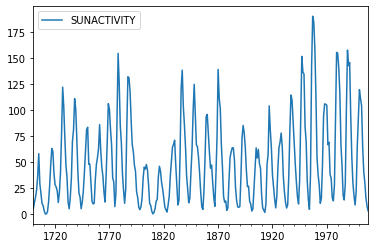

In [9]:
df.plot()

Preparando para calcular um numero de defasagens para autocorrelacao, e calculando o modelo ACF e PACF para a quantidade de defasagens estipulada. 

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


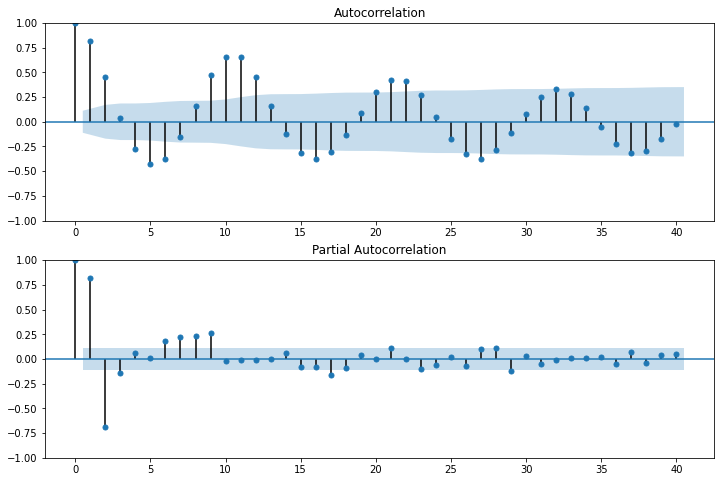

In [5]:
qtde_defasagens = 40
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(),lags=qtde_defasagens, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=qtde_defasagens,ax=ax2)

Estipulando parametros para modelo AR e MA (p e q)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be

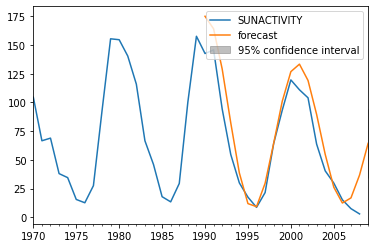

In [13]:
p = 3
q = 2
res = sm.tsa.ARMA(df, (p,q)).fit()
fig, ax = plt.subplots()
ax = df.loc['1970':].plot(ax=ax)
fig= res.plot_predict('1990','2009',dynamic = True, ax=ax, plot_insample=False)
plt.show()

# **Metodos Autoregressivos Integrados de Medias Moveis - ARIMA**

In [15]:
with pd.option_context('display.max_rows',6):
  print(df)

            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0
...                 ...
2006-12-31         15.2
2007-12-31          7.5
2008-12-31          2.9

[309 rows x 1 columns]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 1700-12-31 to 2008-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUNACTIVITY  309 non-null    float64
dtypes: float64(1)
memory usage: 12.9 KB


Importar biblioteca Statsmodels para fazer uso do PD ARIMA


In [34]:
import statsmodels.api as sm

In [1]:

!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


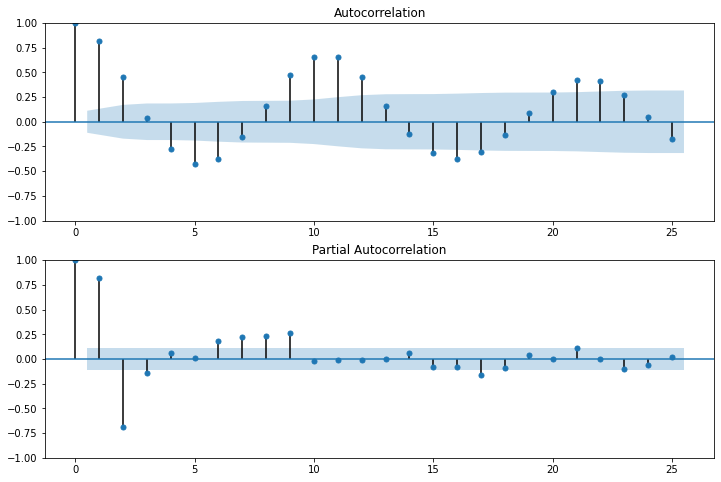

In [6]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,ax=ax2)

PMDARIMA


In [7]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['SUNACTIVITY'],
                          trace=True,
                          suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=0.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=0.53 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2577.122, Time=1.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=0.54 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

In [8]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df['SUNACTIVITY'],
               order=(2,1,3))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1280.477
Date:                Sun, 06 Nov 2022   AIC                           2572.954
Time:                        14:43:50   BIC                           2595.335
Sample:                    12-31-1700   HQIC                          2581.903
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6145      0.026     62.096      0.000       1.564       1.665
ar.L2         -0.9354      0.022    -41.820      0.000      -0.979      -0.892
ma.L1         -1.4392      0.059    -24.590      0.0

In [9]:
modelo_fit.predict()

1700-12-31     0.000000
1701-12-31     5.001522
1702-12-31    14.216050
1703-12-31    17.941763
1704-12-31    25.179053
                ...    
2004-12-31    32.868810
2005-12-31    23.051819
2006-12-31    25.966227
2007-12-31    21.072536
2008-12-31    24.232068
Freq: A-DEC, Name: predicted_mean, Length: 309, dtype: float64

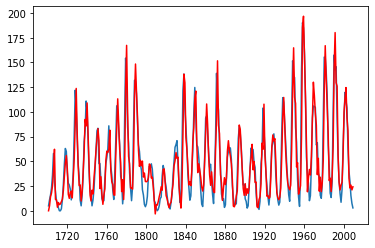

In [11]:
inicio = 0
fim = len(df)-1
predicoes= modelo_fit.predict(
    start = 0, end = fim).rename('Predicoes ARIMA')
plt.plot(df)
plt.plot(predicoes, color='red')


calculando e exibindo a diferenca entre predicoes e valor original da variavel.

In [13]:
err = df['SUNACTIVITY'] - predicoes

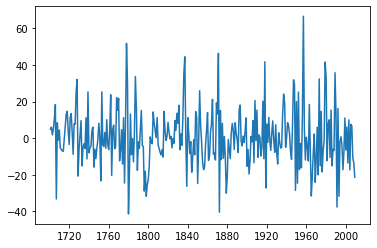

In [18]:
plt.plot(err)

Prevendo valor futuro de variavel

In [19]:
predicoes = modelo_fit.predict(fim+1)
print(predicoes)

2009-12-31    25.823885
Freq: A-DEC, dtype: float64


# **Controle de Qualidade do modelo**
## Dados Reais x Dados Preditos

Importando bibliotecas para fazer controle de qualidade (numpy, matplotlib geralmente ja estarao carregadas).

In [25]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


In [22]:
n=100
periodo = np.arange(n)  #criando um vetor de nome periodo, comprimento 100.
y_teste = np.random.standard_normal(n)  #criando dados sinteticos de treino
y_pred = y_teste + 0.5*np.random.standard_normal(n) #criando perturbacao no dados de teste



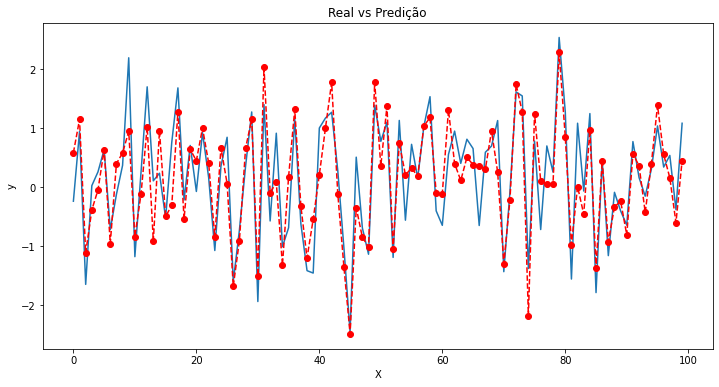

In [23]:
plt.figure(figsize=(12,6))
plt.plot(periodo,y_pred)
plt.plot(periodo,y_teste, 'ro--')
plt.title('Real vs Predição')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

## Erro Medio Absoluto (MAE - Mean Absolute Error)


### $ MAE = \frac1n ×\sum _ {j=1} ^ {n} \mid Y_j - y_j \mid $

In [26]:
print('MAE: ', metrics.mean_absolute_error(y_teste,y_pred) )

MAE:  0.3986976058726696


## Erro Medio Quadratico (MSE - Mean Squared Error)



### $ MSE = \frac1N ×\sum _ {i} ^ {n} (Y_i - y_i)^2 $


In [29]:
print('MSE: ', metrics.mean_squared_error(y_teste,y_pred))

MSE:  0.2363770508648469


## Erro Raiz Medio Quadratico (RMSE - Root Mean Squared Error)



### $ RMSE = \sqrt{\frac1N ×\sum _ {i} ^ {n} (Y_i - y_i)^2} $


In [30]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_teste,y_pred)))

RMSE:  0.48618623064094163
